In [11]:
from src.helpers.experiment import create_tsfresh_dataframe
from run import Experiment
from src.bgc_providers.ohio_bgc_provider import OhioBgcProvider
from src.featurizers.tsfresh import TsfreshFeaturizer

In [7]:
provider = OhioBgcProvider()
for glucose_event in provider.get_glycose_levels()[:20]:
    print(glucose_event.attrib['value'])


101
98
104
112
120
127
135
142
140
145
148
151
150
124
130
127
121
115
111
109


In [12]:
tsfresh_df = provider.tsfresh_dataframe()

tsfresh_df.head(20)

,time,bg_value,id
0,0.00,101,a
1,0.08,98,a
2,0.17,104,a
3,0.25,112,a
4,0.33,120,a
5,0.42,127,a
6,0.50,135,a
7,0.58,142,a
8,0.67,140,a
9,0.75,145,a


  0%|          | 0/9 [00:00<?, ?it/s]

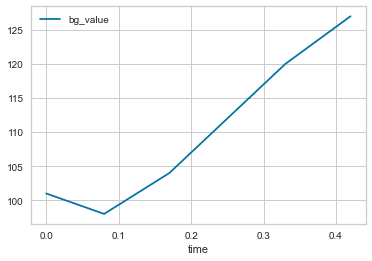

 11%|█         | 1/9 [00:05<00:45,  5.64s/it]

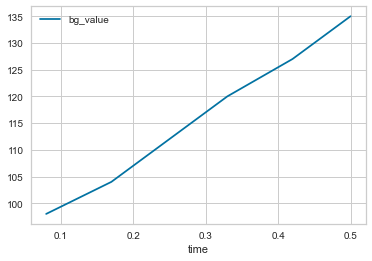

 22%|██▏       | 2/9 [00:11<00:39,  5.61s/it]

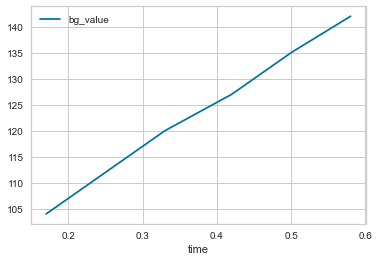

 33%|███▎      | 3/9 [00:16<00:33,  5.55s/it]

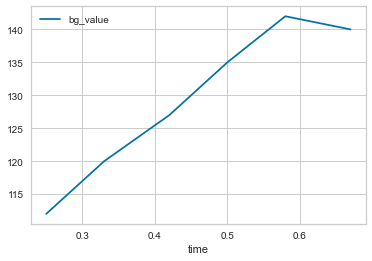

 44%|████▍     | 4/9 [00:22<00:27,  5.51s/it]

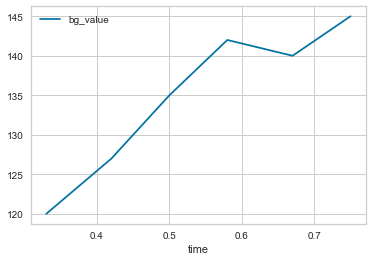

 56%|█████▌    | 5/9 [00:27<00:22,  5.54s/it]

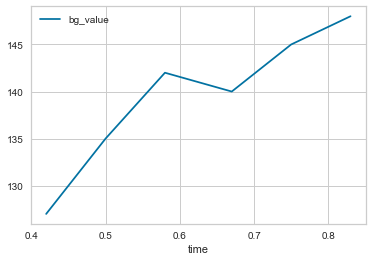

 67%|██████▋   | 6/9 [00:33<00:16,  5.53s/it]

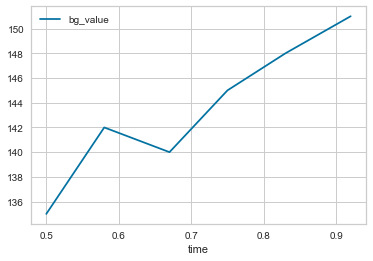

 78%|███████▊  | 7/9 [00:38<00:11,  5.51s/it]

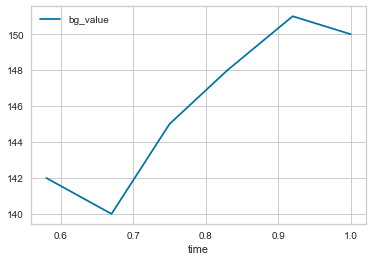

 89%|████████▉ | 8/9 [00:44<00:05,  5.51s/it]

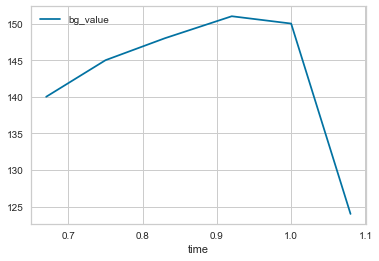

100%|██████████| 9/9 [00:49<00:00,  5.53s/it]


In [15]:
ts = TsfreshFeaturizer(tsfresh_df.head(20),6,6,plot_chunks=True)
feature_df = ts.create_labeled_dataframe()

In [17]:
ts.labeled_dataframe

,bg_value__sum_values,bg_value__median,bg_value__mean,bg_value__length,bg_value__standard_deviation,bg_value__variance,bg_value__root_mean_square,bg_value__maximum,bg_value__absolute_maximum,bg_value__minimum,start,end,start_time,end_time,label
0,662.0,108.0,110.333333,6.0,10.434984,108.888889,110.825689,127.0,127.0,98.0,0,5,0.00,0.42,151
1,696.0,116.0,116.000000,6.0,12.793227,163.666667,116.703328,135.0,135.0,98.0,1,6,0.08,0.50,150
2,740.0,123.5,123.333333,6.0,12.982895,168.555556,124.014784,142.0,142.0,104.0,2,7,0.17,0.58,124
3,776.0,131.0,129.333333,6.0,10.796090,116.555556,129.783152,142.0,142.0,112.0,3,8,0.25,0.67,130
4,809.0,137.5,134.833333,6.0,8.782875,77.138889,135.119083,145.0,145.0,120.0,4,9,0.33,0.75,127
5,837.0,141.0,139.500000,6.0,6.898067,47.583333,139.670445,148.0,148.0,127.0,5,10,0.42,0.83,121
6,861.0,143.5,143.500000,6.0,5.251984,27.583333,143.596077,151.0,151.0,135.0,6,11,0.50,0.92,115
7,876.0,146.5,146.000000,6.0,4.041452,16.333333,146.055925,151.0,151.0,140.0,7,12,0.58,1.00,111
8,858.0,146.5,143.000000,6.0,9.237604,85.333333,143.298058,151.0,151.0,124.0,8,13,0.67,1.08,109


In [18]:
ts.labeled_dataframe.columns

Index(['bg_value__sum_values', 'bg_value__median', 'bg_value__mean',
       'bg_value__length', 'bg_value__standard_deviation',
       'bg_value__variance', 'bg_value__root_mean_square', 'bg_value__maximum',
       'bg_value__absolute_maximum', 'bg_value__minimum', 'start', 'end',
       'start_time', 'end_time', 'label'],
      dtype='object')

In [5]:
exp = Experiment(559,6,6, enable_neptune=False)

In [6]:
df = create_tsfresh_dataframe(exp.train_parameters)
df

2022-06-08 14:44:52.843 | INFO     | src.helpers.experiment:create_ds_name:12 - dataframes/559_train_0_6_6.pkl
2022-06-08 14:44:52.931 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:19 - {'ohio_no': 559, 'scope': 'train', 'train_ds_size': 0, 'window_size': 6, 'prediction_horizon': 6, 'minimal_features': False}
2022-06-08 14:44:53.117 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:22 - Found existing pickle file. Continuing...
2022-06-08 14:44:53.118 | INFO     | src.helpers.dataframe:read_df:11 - Attempting to read from pickle file dataframes/559_train_0_6_6.pkl


,bg_value__variance_larger_than_standard_deviation,bg_value__has_duplicate_max,bg_value__has_duplicate_min,bg_value__has_duplicate,bg_value__sum_values,bg_value__abs_energy,bg_value__mean_abs_change,bg_value__mean_change,bg_value__mean_second_derivative_central,bg_value__median,bg_value__mean,bg_value__length,bg_value__standard_deviation,bg_value__variation_coefficient,bg_value__variance,bg_value__skewness,bg_value__kurtosis,bg_value__root_mean_square,bg_value__absolute_sum_of_changes,bg_value__longest_strike_below_mean,bg_value__longest_strike_above_mean,bg_value__count_above_mean,bg_value__count_below_mean,bg_value__last_location_of_maximum,bg_value__first_location_of_maximum,bg_value__last_location_of_minimum,bg_value__first_location_of_minimum,bg_value__percentage_of_reoccurring_values_to_all_values,bg_value__percentage_of_reoccurring_datapoints_to_all_datapoints,bg_value__sum_of_reoccurring_values,bg_value__sum_of_reoccurring_data_points,bg_value__ratio_value_number_to_time_series_length,bg_value__sample_entropy,bg_value__maximum,bg_value__minimum,bg_value__benford_correlation,bg_value__time_reversal_asymmetry_statistic__lag_1,bg_value__time_reversal_asymmetry_statistic__lag_2,bg_value__time_reversal_asymmetry_statistic__lag_3,bg_value__c3__lag_1,bg_value__c3__lag_2,bg_value__c3__lag_3,bg_value__cid_ce__normalize_True,bg_value__cid_ce__normalize_False,bg_value__symmetry_looking__r_0.0,bg_value__symmetry_looking__r_0.05,bg_value__symmetry_looking__r_0.1,bg_value__symmetry_looking__r_0.15000000000000002,bg_value__symmetry_looking__r_0.2,bg_value__symmetry_looking__r_0.25,bg_value__symmetry_looking__r_0.30000000000000004,bg_value__symmetry_looking__r_0.35000000000000003,bg_value__symmetry_looking__r_0.4,bg_value__symmetry_looking__r_0.45,bg_value__symmetry_looking__r_0.5,bg_value__symmetry_looking__r_0.55,bg_value__symmetry_looking__r_0.6000000000000001,bg_value__symmetry_looking__r_0.65,bg_value__symmetry_looking__r_0.7000000000000001,bg_value__symmetry_looking__r_0.75,bg_value__symmetry_looking__r_0.8,bg_value__symmetry_looking__r_0.8500000000000001,bg_value__symmetry_looking__r_0.9,bg_value__symmetry_looking__r_0.9500000000000001,bg_value__large_standard_deviation__r_0.05,bg_value__large_standard_deviation__r_0.1,bg_value__large_standard_deviation__r_0.15000000000000002,bg_value__large_standard_deviation__r_0.2,bg_value__large_standard_deviation__r_0.25,bg_value__large_standard_deviation__r_0.30000000000000004,bg_value__large_standard_deviation__r_0.35000000000000003,bg_value__large_standard_deviation__r_0.4,bg_value__large_standard_deviation__r_0.45,bg_value__large_standard_deviation__r_0.5,bg_value__large_standard_deviation__r_0.55,bg_value__large_standard_deviation__r_0.6000000000000001,bg_value__large_standard_deviation__r_0.65,bg_value__large_standard_deviation__r_0.7000000000000001,bg_value__large_standard_deviation__r_0.75,bg_value__large_standard_deviation__r_0.8,bg_value__large_standard_deviation__r_0.8500000000000001,bg_value__large_standard_deviation__r_0.9,bg_value__large_standard_deviation__r_0.9500000000000001,bg_value__quantile__q_0.1,bg_value__quantile__q_0.2,bg_value__quantile__q_0.3,bg_value__quantile__q_0.4,bg_value__quantile__q_0.6,bg_value__quantile__q_0.7,bg_value__quantile__q_0.8,bg_value__quantile__q_0.9,bg_value__autocorrelation__lag_0,bg_value__autocorrelation__lag_1,bg_value__autocorrelation__lag_2,bg_value__autocorrelation__lag_3,bg_value__autocorrelation__lag_4,bg_value__autocorrelation__lag_5,bg_value__autocorrelation__lag_6,bg_value__autocorrelation__lag_7,bg_value__autocorrelation__lag_8,bg_value__autocorrelation__lag_9,"bg_value__agg_autocorrelation__f_agg_""mean""__maxlag_40","bg_value__agg_autocorrelation__f_agg_""median""__maxlag_40","bg_value__agg_autocorrelation__f_agg_""var""__maxlag_40",bg_value__partial_autocorrelation__lag_0,bg_value__partial_autocorrelation__lag_1,bg_value__partial_autocorrelation__lag_2,bg_value__partial_autocorrelation__lag_3,bg_value__partial_autocorrelation__

In [22]:
print(df.columns)

Index(['bg_value__variance_larger_than_standard_deviation',
       'bg_value__has_duplicate_max', 'bg_value__has_duplicate_min',
       'bg_value__has_duplicate', 'bg_value__sum_values',
       'bg_value__abs_energy', 'bg_value__mean_abs_change',
       'bg_value__mean_change', 'bg_value__mean_second_derivative_central',
       'bg_value__median',
       ...
       'bg_value__matrix_profile__feature_"max"__threshold_0.98',
       'bg_value__matrix_profile__feature_"mean"__threshold_0.98',
       'bg_value__matrix_profile__feature_"median"__threshold_0.98',
       'bg_value__matrix_profile__feature_"25"__threshold_0.98',
       'bg_value__matrix_profile__feature_"75"__threshold_0.98', 'start',
       'end', 'start_time', 'end_time', 'label'],
      dtype='object', length=792)


In [25]:
df.to_csv('exp1.csv')